In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
digit = load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df['target'] = digit.target
df['target_names'] = df.target.apply(lambda x: digit.target_names[x])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


In [5]:
df.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [6]:
X = digit.data
Y = digit.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1, stratify=Y)
X_train.shape, X_test.shape

((1257, 64), (540, 64))

# Random Forest Classifier

In [7]:
rfc = RandomForestClassifier(n_estimators=64, verbose=2, oob_score=True, max_samples=0.8, max_features='sqrt', ccp_alpha=0.00584136)
rfc.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 64
building tree 2 of 64
building tree 3 of 64
building tree 4 of 64
building tree 5 of 64
building tree 6 of 64
building tree 7 of 64
building tree 8 of 64
building tree 9 of 64
building tree 10 of 64
building tree 11 of 64
building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


RandomForestClassifier(ccp_alpha=0.00584136, max_samples=0.8, n_estimators=64,
                       oob_score=True, verbose=2)

In [8]:
rfc.score(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


0.9817024661893397

In [9]:
rfc.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


0.9407407407407408

In [10]:
rfc.oob_score_

0.9411296738265712

In [11]:
feature_importances = rfc.feature_importances_
feature_importances.shape

(64,)

In [12]:
len(digit.feature_names)

64

In [13]:
df = pd.DataFrame({
    'Feature': digit.feature_names,
    'Importance': feature_importances
})
df.sort_values(by='Importance', ascending=False, inplace=True)

In [14]:
df

,Feature,Importance
21,pixel_2_5,0.065609
33,pixel_4_1,0.047444
42,pixel_5_2,0.043614
36,pixel_4_4,0.043074
26,pixel_3_2,0.040677
...,...,...
24,pixel_3_0,0.000000
23,pixel_2_7,0.000000
16,pixel_2_0,0.000000
8,pixel_1_0,0.000000


# Decision Tree Classifier

In [15]:
dtc = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.00584136)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.00584136)

In [16]:
dtc.score(X_train, Y_train)

0.888623707239459

In [17]:
dtc.score(X_test, Y_test)

0.8314814814814815

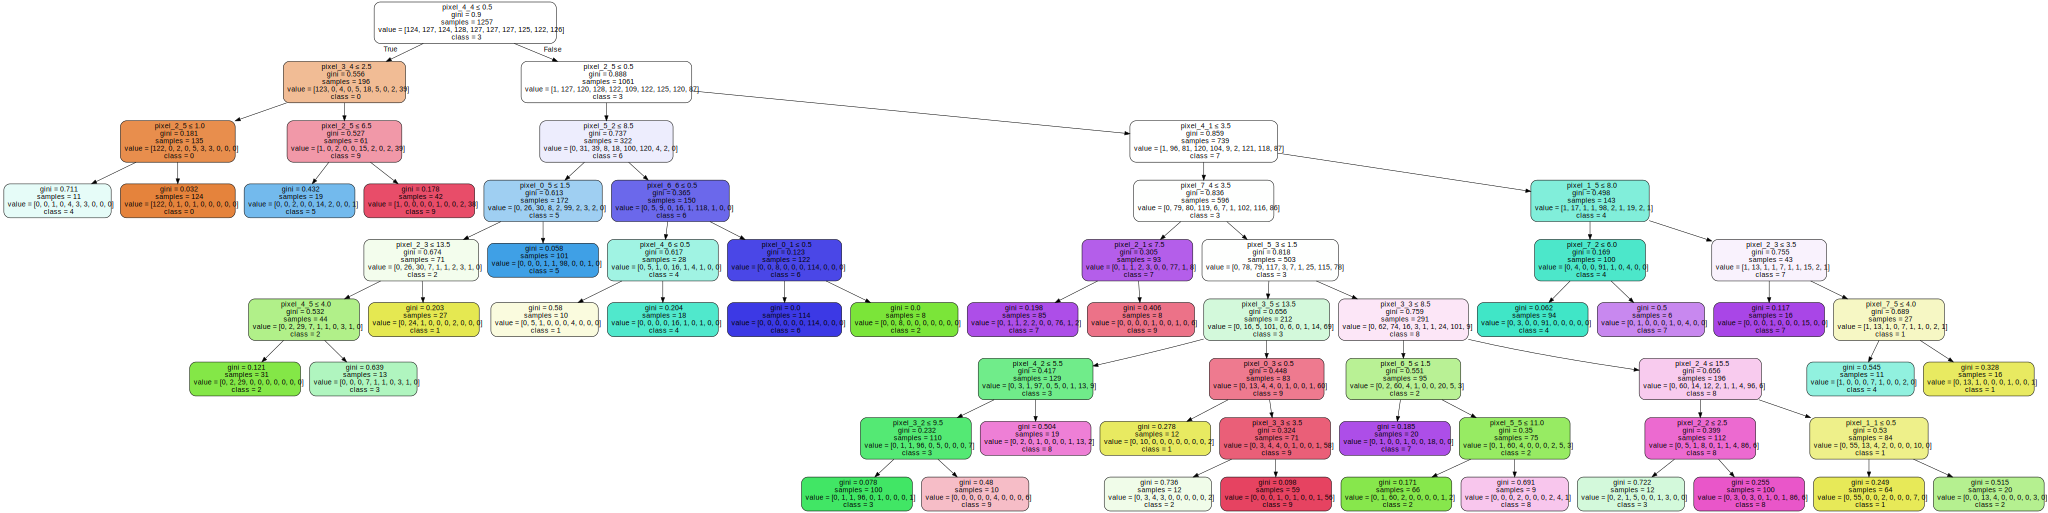

<Figure size 1500x1500 with 0 Axes>

In [18]:
import graphviz
dot = export_graphviz(dtc, feature_names=digit.feature_names, class_names=digit.target_names.astype('str'), 
                      impurity=True, filled=True, rounded=True, special_characters=True)

plt.figure(figsize=(15,15))
graph = graphviz.Source(dot)
graph

In [19]:
path = dtc.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[(ccp_alphas>0.0025) & (ccp_alphas<0.02)]
ccp_alphas

array([0.00258552, 0.0026346 , 0.00265182, 0.00265182, 0.00278441,
       0.00281024, 0.0028507 , 0.00297688, 0.00298941, 0.00301856,
       0.00303947, 0.00328825, 0.00330004, 0.00333486, 0.00334129,
       0.00381862, 0.00388491, 0.00393842, 0.00395878, 0.0039861 ,
       0.00403645, 0.00410388, 0.00417312, 0.00459522, 0.00462093,
       0.00584136, 0.0062204 , 0.00640532, 0.00657638, 0.00666996,
       0.00695419, 0.0083786 , 0.00861838, 0.00903696, 0.00954457,
       0.0100479 , 0.01028423, 0.01189405, 0.01310837, 0.01459138,
       0.01490751, 0.01511277, 0.01740468, 0.01777973, 0.01790782])

In [20]:
def cross_val_score(X, Y):
    
    dtc = DecisionTreeClassifier(ccp_alpha=i)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    train_scores = []
    test_scores = []
    for train_idx, test_idx in kfold.split(X, Y):
        X_train, X_test, Y_train, Y_test = X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]
        dtc.fit(X_train, Y_train)
        train_score = dtc.score(X_train, Y_train)
        test_score = dtc.score(X_test, Y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
        
    return train_scores, test_scores

In [21]:
train_scores = []
test_scores = []
for i in ccp_alphas:
    train, test = cross_val_score(X, Y)
    
    mean_train_score = np.mean(train)
    mean_test_score = np.mean(test)

    train_scores.append(mean_train_score)
    test_scores.append(mean_test_score)

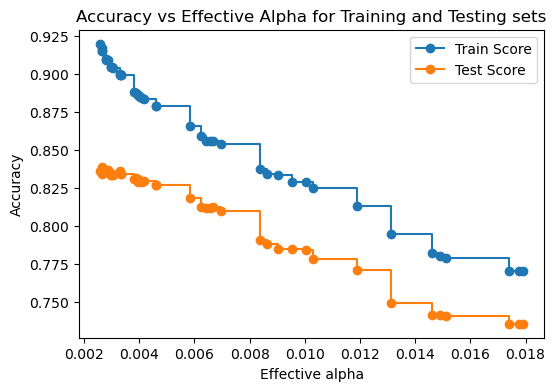

In [22]:
plt.figure(figsize=(6, 4))

plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Score', drawstyle='steps-post')

plt.xlabel("Effective alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Training and Testing sets")
plt.legend()